In [1]:
#This notebook creates Figure 8 from Reichl et al., 2024 submitted to ESS

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean
from glob import glob
import sys
import gsw as gsw
import copy as copy
import matplotlib as mpl
def modtime(H):
    try:
        datetimeindex = H.indexes['Time'].to_datetimeindex()
        H['Time']=datetimeindex
    except:
        datetimeindex = H.indexes['time'].to_datetimeindex()
        H['time']=datetimeindex
        
    return H

In [2]:
#This should point to where LES and SCM data are located.
data_loc = '/net/bgr/Work/Tropics_Paper/Paper/Data'
LES0 = xr.open_dataset(data_loc+'/ROMS_PSH_6HRLIN_0N140W_360x360x216_22OCT2020.nc').isel(z=slice(0,215))
LES3 = xr.open_dataset(data_loc+'/ROMS_PSH_6HRLIN_3N140W_360x360x216_22OCT2020.nc').isel(z=slice(0,215))


rho0=LES0.rho0.values
alpha = LES0.alpha.values
beta = LES0.beta.values

for LES in [LES0,LES3]:

    # w'b' = w'T' * g alpha
    # m2/s3 = m/s * K * m * 1/s2 * 1/K

    LES['dTdt']=(LES.tempme.differentiate(coord='time',datetime_unit='s')).T

LES0_1h = LES0.resample(time='1H').interpolate(kind="linear")
LES3_1h = LES3.resample(time='1H').interpolate(kind="linear")

    
for LES1h in [LES0_1h,LES3_1h]:
    LES1h['dTdt']=(LES1h.tempme.differentiate(coord='time',datetime_unit='s')).T


/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:562: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/net2/bgr/anaconda3/envs/oceans/lib/python3.8/site-packages/xarray/core/missing.py:563: FutureWarning: Passing method to 

In [3]:
MOM0 = modtime(xr.open_dataset(data_loc+'/19851002.ocean_hourly_ePBL_RH18_0.nc').isel(xh=0,yh=0,xq=0).squeeze())
MOM3 = modtime(xr.open_dataset(data_loc+'/19851002.ocean_hourly_ePBL_RH18_3.nc').isel(xh=0,yh=0,xq=0).squeeze())

for MOM in [MOM0,MOM3]:
    MOM['dTdt']=MOM.thetao.differentiate(coord='time',datetime_unit='s')


/tmp/ipykernel_3730817/2925081973.py:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = H.indexes['time'].to_datetimeindex()
/tmp/ipykernel_3730817/2925081973.py:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = H.indexes['time'].to_datetimeindex()


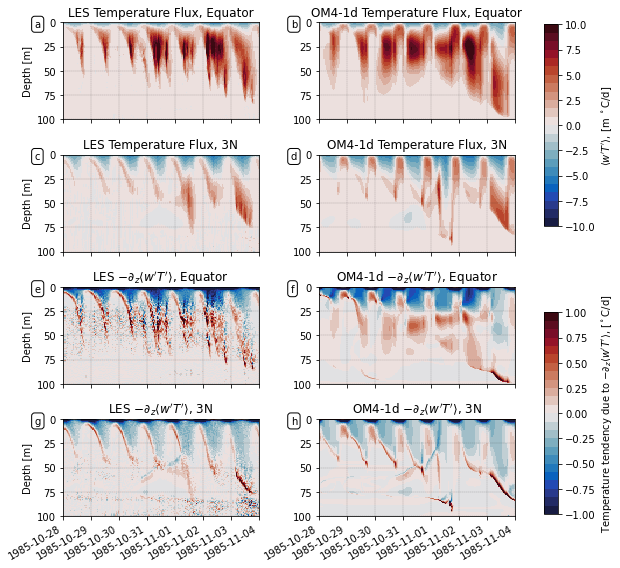

In [4]:
# Compare Temperatures

cmap=cmocean.cm.balance
levels=np.linspace(-10,10,25)

f,a = plt.subplots(4,2,figsize=(8,8))

ax=a.ravel()[0]
C=ax.pcolormesh(LES0_1h.time.values,-1*LES0_1h.z,(-LES0_1h.tempw+LES0_1h.kappadtdz).values.T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                 )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title('LES Temperature Flux, Equator')
ax.set_ylabel('Depth [m]')

ax=a.ravel()[1]
C=ax.pcolormesh(MOM0.time.values,MOM0.zi.values,(MOM0.Tflx_dia_diff).T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                  )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title('OM4-1d Temperature Flux, Equator')

ax=a.ravel()[2]
C=ax.pcolormesh(LES3_1h.time.values,-1*LES3_1h.z,(-LES3_1h.tempw+LES3_1h.kappadtdz).values.T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                 )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title('LES Temperature Flux, 3N')
ax.set_ylabel('Depth [m]')

ax=a.ravel()[3]
C=ax.pcolormesh(MOM3.time.values,MOM3.zi.values,(MOM3.Tflx_dia_diff).T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                  )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title('OM4-1d Temperature Flux, 3N')

cmap=cmocean.cm.balance
levels=np.linspace(-1,1,25)


ax=a.ravel()[4]
#C2=ax.pcolormesh(LES0_1h.time.values,-1*LES0_1h.z,(-LES0_1h.tempw+LES0_1h.kappadtdz).values.T*86400,
C2=ax.pcolormesh(LES0_1h.time.values,-1*LES0_1h.z,-np.gradient(-LES0_1h.tempw+LES0_1h.kappadtdz,-1*LES0_1h.z,axis=1).T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                 )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title(r'LES $-\partial_z\left<w^\prime T^\prime\right>$, Equator')
ax.set_ylabel('Depth [m]')

ax=a.ravel()[5]
#C2=ax.pcolormesh(MOM0.time.values,MOM0.zi.values,(MOM0.Tflx_dia_diff).T*86400,
C2=ax.pcolormesh(MOM0.time.values,MOM0.zi.values,-np.gradient(MOM0.Tflx_dia_diff,MOM0.zi.values,axis=1).T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                  )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title(r'OM4-1d $-\partial_z\left<w^\prime T^\prime\right>$, Equator')

ax=a.ravel()[6]
#C2=ax.pcolormesh(LES3_1h.time.values,-1*LES3_1h.z,(-LES3_1h.tempw+LES3_1h.kappadtdz).values.T*86400,
C2=ax.pcolormesh(LES3_1h.time.values,-1*LES3_1h.z,-np.gradient(-LES3_1h.tempw+LES3_1h.kappadtdz,-1*LES3_1h.z,axis=1).T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                 )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title(r'LES $-\partial_z\left<w^\prime T^\prime\right>$, 3N')
ax.set_ylabel('Depth [m]')

ax=a.ravel()[7]
C2=ax.pcolormesh(MOM3.time.values,MOM3.zi.values,-np.gradient(MOM3.Tflx_dia_diff,MOM3.zi.values,axis=1).T*86400,
                  cmap=cmap,
                  norm = mpl.colors.BoundaryNorm(levels, ncolors=cmap.N, clip=False)
                  )
ax.grid(True, color='k', linestyle=':', linewidth=0.25)
ax.set_xlim('1985/10/28','1985/11/04')
ax.set_ylim(100,0)
ax.set_title(r'OM4-1d $-\partial_z\left<w^\prime T^\prime\right>$, 3N')


f.autofmt_xdate()
f.tight_layout()

f.subplots_adjust(right=0.9)

cbar_ax = f.add_axes([0.95, 0.6, 0.025, 0.35])
cb=f.colorbar(C, cax=cbar_ax)
cb.set_label(r'$\left<w^\prime T^\prime\right>$, [m $^\circ$C/d]')
#lbls = ["{:1.1e}".format(i) for i in cb.get_ticks()]
#cb.ax.set(yticks=cb.get_ticks(),yticklabels=lbls)

cbar_ax = f.add_axes([0.95, 0.1, 0.025, 0.35])
cb=f.colorbar(C2, cax=cbar_ax)
cb.set_label(r'Temperature tendency due to $-\partial_z\left<w^\prime T^\prime\right>$, [$^\circ$C/d]')
#lbls = ["{:1.1e}".format(i) for i in cb.get_ticks()]
#cb.ax.set(yticks=cb.get_ticks(),yticklabels=lbls)

for AXi in range(8):
    txt='abcdefghijklmnopqrstuvwyxz'[AXi]
    a.ravel()[AXi].text('1985/10/27',5,txt,bbox=dict(boxstyle='round', facecolor='white'))


f.savefig('../Fig/LES-MOM1d-dTdt_and_heatflux.png',dpi=200,bbox_inches = "tight")

